In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
def loadChars(extras):
    x_chars = np.empty([1, 28, 28])
    amount = 1000
    for extra in extras:
        if 'train' in extra:
            amount = 6000
        for i in range(amount):
            char = cv2.imread(extra + str(i + 1) + ".png", 2)
            imInv = cv2.bitwise_not(char)
            x_chars = np.append(x_chars, [imInv], axis=0)
    x_chars = np.delete(x_chars, 0, axis=0)
    return x_chars

x_testX = loadChars(["./test/sum/sum_", "./test/x/x_", "./test/min/min_"])
print(x_testX.shape)
x_trainX = loadChars(["./train/sum/sum_", "./train/x/x_", "./train/min/min_"])
print(x_trainX.shape)

(3001, 28, 28)
(18001, 28, 28)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = np.append(x_train, x_trainX, axis=0)
# x_test = np.append(x_test, x_testX, axis=0)

print(x_train.shape)
print(x_test.shape)

# plt.imshow(x_train[70000], cmap=plt.cm.binary)

(60000, 28, 28)
(10000, 28, 28)


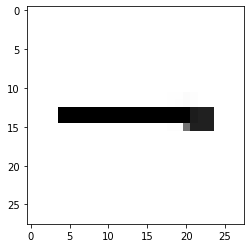

In [11]:
plt.imshow(x_train[76000], cmap=plt.cm.binary)

In [3]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)


In [4]:
# Convert array of labeled data to a 'one-hot vector'
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[0])
print(y_test.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


In [5]:
y_train = np.insert(y_train, 9, 0 ,axis=1)
y_train = np.insert(y_train, 9, 0 ,axis=1)
y_train = np.insert(y_train, 9, 0 ,axis=1)

y_test = np.insert(y_test, 9, 0 ,axis=1)
y_test = np.insert(y_test, 9, 0 ,axis=1)
y_test = np.insert(y_test, 9, 0 ,axis=1)

print(y_train[9000])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [15]:
print(y_train[6000])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [16]:
y_trainX = np.zeros([1, 13])
for i in range(18000):
    if i < 6000:
        y_trainX = np.append(y_trainX, [[0,0,0,0,0,0,0,0,0,0,1,0,0]], axis=0)
    elif i >= 6000 and i < 12000:
        y_trainX = np.append(y_trainX, [[0,0,0,0,0,0,0,0,0,0,0,1,0]], axis=0)        
    else:
        y_trainX = np.append(y_trainX, [[0,0,0,0,0,0,0,0,0,0,0,0,1]], axis=0)

y_testX = np.zeros([1, 13])
for i in range(3000):
    if i < 1000:
        y_testX = np.append(y_testX, [[0,0,0,0,0,0,0,0,0,0,1,0,0]], axis=0)
    elif i >= 1000 and i < 2000:
        y_testX = np.append(y_testX, [[0,0,0,0,0,0,0,0,0,0,0,1,0]], axis=0)        
    else:
        y_testX = np.append(y_testX, [[0,0,0,0,0,0,0,0,0,0,0,0,1]], axis=0)

print(y_trainX[12000])
print(y_testX.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(3001, 13)


In [29]:
print(y_trainX[7001])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
y_train = np.append(y_train, y_trainX, axis=0)
y_test = np.append(y_test, y_testX, axis=0)

In [30]:
print(y_train[67001])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [6]:
# Randomize arrays
randomize = np.arange(len(x_train))
np.random.shuffle(randomize)
x_train = x_train[randomize]
y_train = y_train[randomize]
print(x_train.shape)


(60000, 28, 28)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


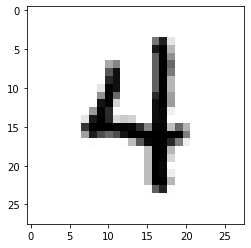

In [38]:
print(y_train[52104])
plt.imshow(x_train[52104], cmap=plt.cm.binary)

In [7]:
randomize = np.arange(len(x_test))
np.random.shuffle(randomize)
x_test = x_test[randomize]
y_test = y_test[randomize]
print(x_test.shape)

(10000, 28, 28)


In [8]:
x_train = x_train.astype(np.float32).reshape(-1, 784)/255.0
x_test = x_train.astype(np.float32).reshape(-1, 784)/255.0


In [9]:
model = Sequential()
model.add(Dense(112, activation='relu'))
model.add(Dense(112, activation='relu'))
model.add(Dense(13, activation='softmax')) # softmax = logistic regretion

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.save('./digit_recognizer.h5')


Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2369 - accuracy: 0.9313
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.1000 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0694 - accuracy: 0.9785
Epoch 4/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0539 - accuracy: 0.9826
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0429 - accuracy: 0.9860
